# OSM Overpass API kullanarak Pyhton ile veri indirme

OpenStreetMap üzerinden veri indirme seçeneklerinden biri de Python ile OSM Overpass API üzerinden sorgu yazarak veriyi çekmektir. Belirli bir konumdaki istenen verilerin çekilmesi için Overpass API kendi sorgu dilinde varlıkları ve konumu tanımlamak gerekir. Örneğin İstanbul ilinde bulunan restaurantların OSM verisini indirerek dağılımını görselleştirmek için Python ile Overpass API sorgusu yazarak veriyi JSON formatında indirip restaurantların coğrafi koordinatlarını numpy array olarak yazdıralım ve dağılımlarını görselleştirelim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
area[name="İstanbul"];
(node(area)[amenity=restaurant][name];
way(area)[amenity=restaurant][name];
rel(area)[amenity=restaurant][name];
);
out center;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
data = response.json()

In [3]:
# Collect coords into list
coords = []
for element in data['elements']:
  if element['type'] == 'node':
    lon = element['lon']
    lat = element['lat']
    coords.append((lon, lat))
  elif 'center' in element:
    lon = element['center']['lon']
    lat = element['center']['lat']
    coords.append((lon, lat))

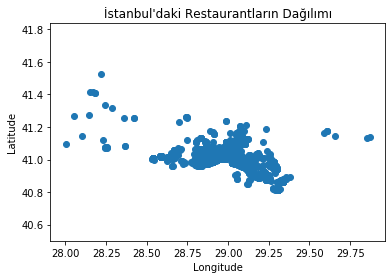

In [4]:
# Convert coordinates into numpy array
X = np.array(coords)
plt.plot(X[:, 0], X[:, 1], 'o')
plt.title("İstanbul'daki Restaurantların Dağılımı")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('equal')
plt.show()

### Aynı sorguyu overpass kütüphanesini kullanarak gerçekleştirip folium ile harita üzerinde görelim.

In [5]:
import overpass
import geojson
import folium
from folium import GeoJson

api = overpass.API()

res = api.get("""
    area[name="İstanbul"];
    (node["amenity"="restaurant"](area);
      way["amenity"="restaurant"](area);
      relation["amenity"="restaurant"](area);
    );
    out meta;
    >;
    out meta qt;
""")

# if you want a str, then dump as string
#geojson_str = geojson.dumps(res)

# dump as file, if you want to save it in file
#with open("./test.geo.json",mode="w") as f:
#  geojson.dump(res,f)

In [6]:
m = folium.Map(location=[41.1944, 28.9651], zoom_start=9)
folium.GeoJson(res).add_to(m)
m